All result files loaded successfully

Loaded results:
- Random Forest: 1 models
- ARIMA/SARIMAX: 3 models
- LSTM: 1 models
- GRU: 1 models

Standardized Results:
           Model_Name   Test_RMSE    Test_MAE   Test_R2  Overfitting_Gap
Random Forest (Tuned)  259.607488  179.426657  0.982941         0.006433
         ARIMA(2,0,1) 1987.764548 1739.378209 -0.000132         0.000000
        SARIMAX_Daily 1519.297656 1146.312445  0.415730         0.000000
         SARIMAX_Exog 1495.107916 1120.940199  0.434187         0.000000
                 LSTM  280.017871  208.076351  0.980180        -0.017640
                  GRU  268.338154  196.250009  0.981798        -0.017626


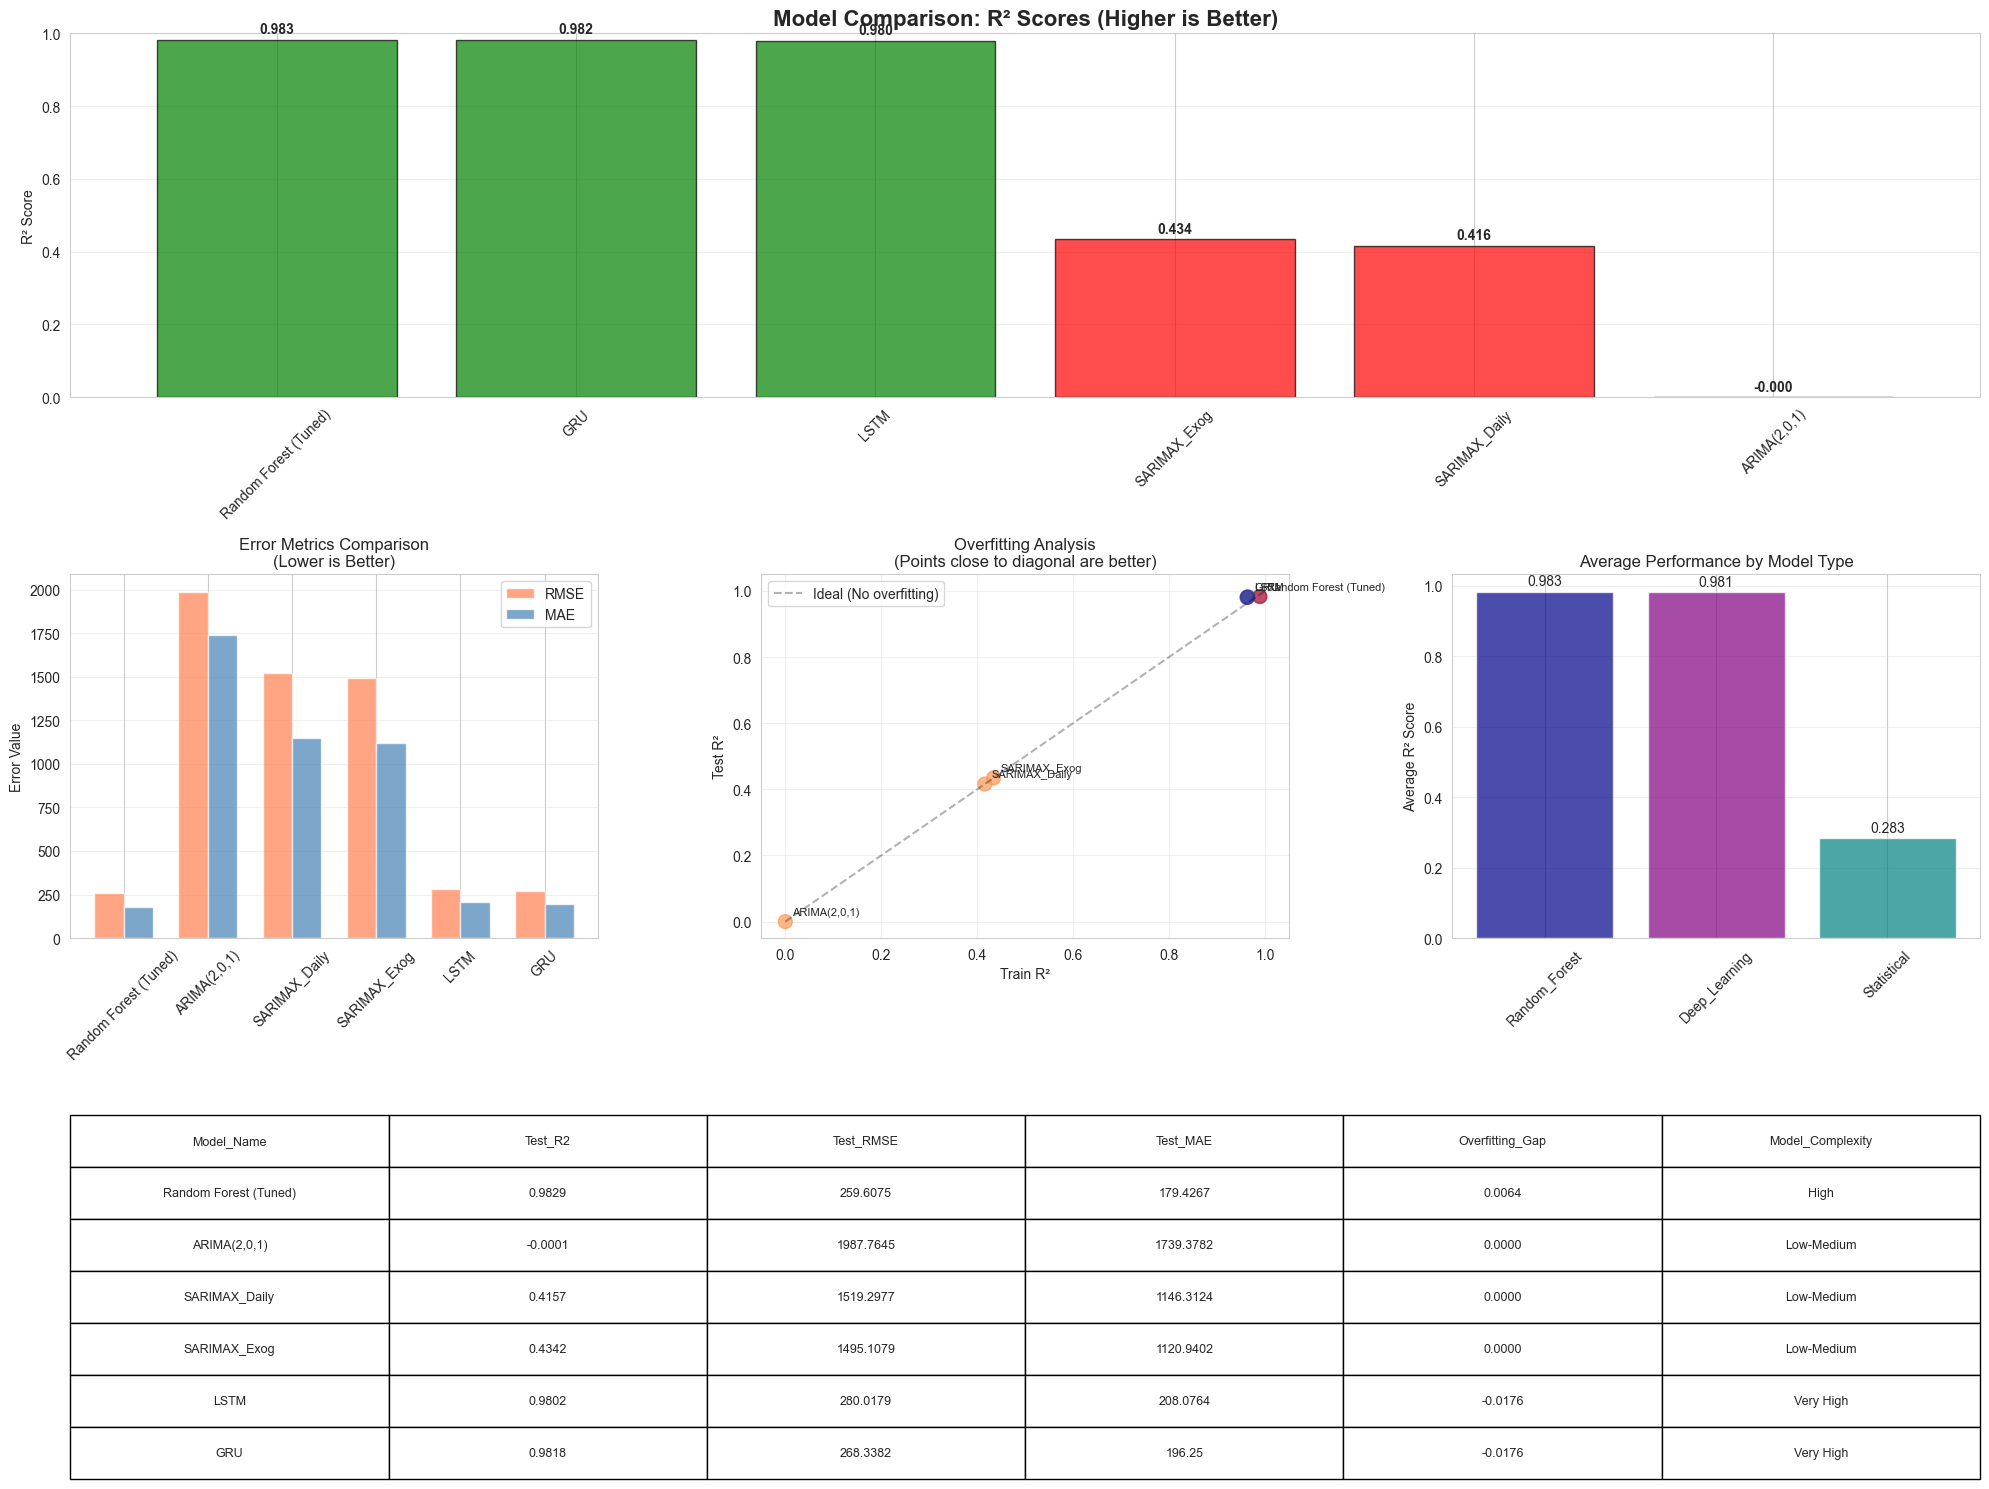

 BEST PERFORMING MODEL: Random Forest (Tuned)
   Test R²: 0.9829
   Test RMSE: 259.61
   Test MAE: 179.43

 SECOND BEST: GRU
   Test R²: 0.9818

 IMPROVEMENT OVER SECOND BEST:
   R² Improvement: +0.12%
   RMSE Reduction: +3.25%

 PERFORMANCE TIERS:
   🔥 HIGH PERFORMANCE (R² > 0.7): ['Random Forest (Tuned)', 'LSTM', 'GRU']
   📉 LOW PERFORMANCE (R² ≤ 0.5): ['ARIMA(2,0,1)', 'SARIMAX_Daily', 'SARIMAX_Exog']


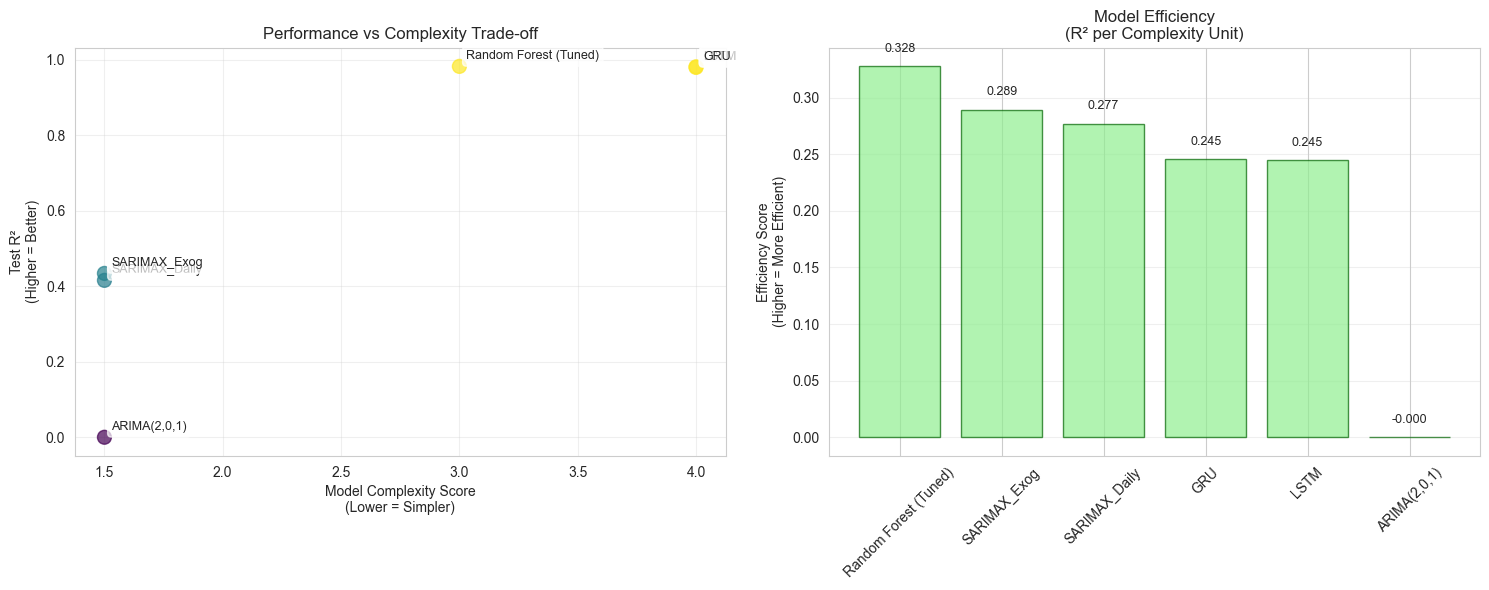


📈 MODEL EFFICIENCY RANKING (Performance per Complexity):
           Model_Name  Efficiency_Score   Test_R2 Model_Complexity
Random Forest (Tuned)          0.327647  0.982941             High
         SARIMAX_Exog          0.289458  0.434187       Low-Medium
        SARIMAX_Daily          0.277154  0.415730       Low-Medium
                  GRU          0.245450  0.981798        Very High
                 LSTM          0.245045  0.980180        Very High
         ARIMA(2,0,1)         -0.000088 -0.000132       Low-Medium
 RECOMMENDED MODELS FOR DIFFERENT USE CASES:
   • Production Deployment: Random Forest (Tuned)
     High accuracy, reliable, maintainable
   • Research Prototyping: Random Forest (Tuned)
     Maximize performance, explore complex patterns
   • Resource Constrained: SARIMAX_Exog
     Balance performance and computational cost

 DETAILED USE CASE SCORES:
           Model_Name  Production_Deployment_Score  Research_Prototyping_Score  Resource_Constrained_Score
Random Fore

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


#1. LOAD ALL RESULTS
# Load individual results
try:
    rf_results = pd.read_csv('rf_results.csv')
    arima_results = pd.read_csv('arima_sarimax_results.csv')
    lstm_results = pd.read_csv('lstm_results.csv') 
    gru_results = pd.read_csv('gru_results.csv')
    
    print("All result files loaded successfully")
    
except FileNotFoundError as e:
    print(f" Missing file: {e}")
    print("Please ensure all workflows have been run successfully")
    raise

# Display what we have
print(f"\nLoaded results:")
print(f"- Random Forest: {len(rf_results)} models")
print(f"- ARIMA/SARIMAX: {len(arima_results)} models") 
print(f"- LSTM: {len(lstm_results)} models")
print(f"- GRU: {len(gru_results)} models")

# 2. STANDARDIZE RESULTS FORMAT
# Standardize Random Forest results
rf_standardized = pd.DataFrame([{
    'Model_Type': 'Random_Forest',
    'Model_Name': 'Random Forest (Tuned)',
    'Test_RMSE': rf_results.iloc[0]['Test_RMSE'],
    'Test_MAE': rf_results.iloc[0]['Test_MAE'],
    'Test_R2': rf_results.iloc[0]['Test_R2'],
    'Train_R2': rf_results.iloc[0]['Train_R2'],
    'Parameters': rf_results.iloc[0]['Best_Params'],
    'Model_Complexity': 'High',
    'Training_Time': 'Medium',
    'Uses_Exogenous': True,
    'Handles_Nonlinearity': True
}])

# Standardize ARIMA/SARIMAX results
arima_standardized = []
for idx, row in arima_results.iterrows():
    arima_standardized.append({
        'Model_Type': 'Statistical',
        'Model_Name': row['Model'],
        'Test_RMSE': row['Test_RMSE'],
        'Test_MAE': row['Test_MAE'], 
        'Test_R2': row['Test_R2'],
        'Train_R2': row['Train_R2'],
        'Parameters': f"Order: {row['Order']}, Seasonal: {row['Seasonal_Order']}",
        'Model_Complexity': 'Low-Medium',
        'Training_Time': 'Fast',
        'Uses_Exogenous': row['Uses_Exogenous'],
        'Handles_Nonlinearity': False
    })

# Standardize LSTM results  
lstm_standardized = pd.DataFrame([{
    'Model_Type': 'Deep_Learning',
    'Model_Name': 'LSTM',
    'Test_RMSE': lstm_results.iloc[0]['test_rmse'],
    'Test_MAE': lstm_results.iloc[0]['test_mae'],
    'Test_R2': lstm_results.iloc[0]['test_r2'],
    'Train_R2': lstm_results.iloc[0]['train_r2'],
    'Parameters': f"Window: {lstm_results.iloc[0]['window_size']}, Features: {lstm_results.iloc[0]['n_features']}",
    'Model_Complexity': 'Very High',
    'Training_Time': 'Slow',
    'Uses_Exogenous': True,
    'Handles_Nonlinearity': True
}])

# Standardize GRU results
gru_standardized = pd.DataFrame([{
    'Model_Type': 'Deep_Learning', 
    'Model_Name': 'GRU',
    'Test_RMSE': gru_results.iloc[0]['Test_RMSE'],
    'Test_MAE': gru_results.iloc[0]['Test_MAE'],
    'Test_R2': gru_results.iloc[0]['Test_R2'],
    'Train_R2': gru_results.iloc[0]['Train_R2'],
    'Parameters': f"Window: {gru_results.iloc[0]['Window_Size']}, Features: {gru_results.iloc[0]['N_Features']}",
    'Model_Complexity': 'Very High',
    'Training_Time': 'Slow',
    'Uses_Exogenous': True,
    'Handles_Nonlinearity': True
}])

# Combine all results
all_models = pd.concat([
    rf_standardized,
    pd.DataFrame(arima_standardized), 
    lstm_standardized,
    gru_standardized
], ignore_index=True)

# Calculate overfitting gap
all_models['Overfitting_Gap'] = all_models['Train_R2'] - all_models['Test_R2']

print("\nStandardized Results:")
print(all_models[['Model_Name', 'Test_RMSE', 'Test_MAE', 'Test_R2', 'Overfitting_Gap']].to_string(index=False))

#  3. COMPREHENSIVE PERFORMANCE COMPARISON

# Create comprehensive comparison plots
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(3, 3, figure=fig)

# Plot 1: R² Comparison (Main Metric)
ax1 = fig.add_subplot(gs[0, :])
models_sorted = all_models.sort_values('Test_R2', ascending=False)
bars = ax1.bar(models_sorted['Model_Name'], models_sorted['Test_R2'], 
              color=['green' if x > 0.7 else 'orange' if x > 0.5 else 'red' for x in models_sorted['Test_R2']],
              alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar, r2 in zip(bars, models_sorted['Test_R2']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{r2:.3f}', ha='center', va='bottom', fontweight='bold')

ax1.set_title('Model Comparison: R² Scores (Higher is Better)', fontsize=16, fontweight='bold')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1.0)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: RMSE and MAE Comparison
ax2 = fig.add_subplot(gs[1, 0])
x_pos = np.arange(len(all_models))
width = 0.35
ax2.bar(x_pos - width/2, all_models['Test_RMSE'], width, label='RMSE', alpha=0.7, color='coral')
ax2.bar(x_pos + width/2, all_models['Test_MAE'], width, label='MAE', alpha=0.7, color='steelblue')
ax2.set_title('Error Metrics Comparison\n(Lower is Better)')
ax2.set_ylabel('Error Value')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(all_models['Model_Name'], rotation=45)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Overfitting Analysis
ax3 = fig.add_subplot(gs[1, 1])
scatter = ax3.scatter(all_models['Train_R2'], all_models['Test_R2'], 
                     s=100, c=all_models['Overfitting_Gap'], cmap='RdYlBu_r', alpha=0.7)
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.3, label='Ideal (No overfitting)')
ax3.set_xlabel('Train R²')
ax3.set_ylabel('Test R²')
ax3.set_title('Overfitting Analysis\n(Points close to diagonal are better)')
ax3.legend()
ax3.grid(alpha=0.3)

# Add labels for points
for i, row in all_models.iterrows():
    ax3.annotate(row['Model_Name'], (row['Train_R2'], row['Test_R2']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Plot 4: Model Type Performance
ax4 = fig.add_subplot(gs[1, 2])
model_types = all_models.groupby('Model_Type')['Test_R2'].mean().sort_values(ascending=False)
bars4 = ax4.bar(model_types.index, model_types.values, 
               color=['darkblue', 'purple', 'teal'], alpha=0.7)
ax4.set_title('Average Performance by Model Type')
ax4.set_ylabel('Average R² Score')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bar, r2 in zip(bars4, model_types.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{r2:.3f}', ha='center', va='bottom')

# Plot 5: Detailed Metrics Table
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('tight')
ax5.axis('off')

# Create table data
table_data = all_models[['Model_Name', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'Overfitting_Gap', 'Model_Complexity']].copy()
table_data = table_data.round(4)
table_data['Overfitting_Gap'] = table_data['Overfitting_Gap'].apply(lambda x: f"{x:.4f}")

table = ax5.table(cellText=table_data.values,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

#  4. STATISTICAL SIGNIFICANCE TESTING
# Calculate performance differences
best_model = all_models.loc[all_models['Test_R2'].idxmax()]
second_best = all_models.nlargest(2, 'Test_R2').iloc[1]

print(f" BEST PERFORMING MODEL: {best_model['Model_Name']}")
print(f"   Test R²: {best_model['Test_R2']:.4f}")
print(f"   Test RMSE: {best_model['Test_RMSE']:.2f}")
print(f"   Test MAE: {best_model['Test_MAE']:.2f}")

print(f"\n SECOND BEST: {second_best['Model_Name']}")
print(f"   Test R²: {second_best['Test_R2']:.4f}")

r2_improvement = ((best_model['Test_R2'] - second_best['Test_R2']) / second_best['Test_R2']) * 100
rmse_improvement = ((second_best['Test_RMSE'] - best_model['Test_RMSE']) / second_best['Test_RMSE']) * 100

print(f"\n IMPROVEMENT OVER SECOND BEST:")
print(f"   R² Improvement: {r2_improvement:+.2f}%")
print(f"   RMSE Reduction: {rmse_improvement:+.2f}%")

# Performance tiers
print(f"\n PERFORMANCE TIERS:")
high_perf = all_models[all_models['Test_R2'] > 0.7]
med_perf = all_models[(all_models['Test_R2'] > 0.5) & (all_models['Test_R2'] <= 0.7)]
low_perf = all_models[all_models['Test_R2'] <= 0.5]

if len(high_perf) > 0:
    print(f"   🔥 HIGH PERFORMANCE (R² > 0.7): {list(high_perf['Model_Name'])}")
if len(med_perf) > 0:
    print(f"  MEDIUM PERFORMANCE (0.5 < R² ≤ 0.7): {list(med_perf['Model_Name'])}")
if len(low_perf) > 0:
    print(f"   LOW PERFORMANCE (R² ≤ 0.5): {list(low_perf['Model_Name'])}")

# 5. TRADE-OFF ANALYSIS: PERFORMANCE vs COMPLEXITY

# Define complexity scores (you can adjust these based on your experience)
complexity_scores = {
    'Very High': 4,
    'High': 3, 
    'Medium': 2,
    'Low-Medium': 1.5,
    'Low': 1
}

all_models['Complexity_Score'] = all_models['Model_Complexity'].map(complexity_scores)

# Create trade-off plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Performance vs Complexity
scatter = ax1.scatter(all_models['Complexity_Score'], all_models['Test_R2'], 
                     s=100, alpha=0.7, c=all_models['Test_R2'], cmap='viridis')

# Add labels
for i, row in all_models.iterrows():
    ax1.annotate(row['Model_Name'], (row['Complexity_Score'], row['Test_R2']),
                xytext=(5, 5), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

ax1.set_xlabel('Model Complexity Score\n(Lower = Simpler)')
ax1.set_ylabel('Test R²\n(Higher = Better)')
ax1.set_title('Performance vs Complexity Trade-off')
ax1.grid(alpha=0.3)

# Plot 2: Efficiency Analysis (Performance per unit complexity)
all_models['Efficiency_Score'] = all_models['Test_R2'] / all_models['Complexity_Score']
efficiency_sorted = all_models.sort_values('Efficiency_Score', ascending=False)

bars = ax2.bar(efficiency_sorted['Model_Name'], efficiency_sorted['Efficiency_Score'],
              color='lightgreen', alpha=0.7, edgecolor='darkgreen')
ax2.set_title('Model Efficiency\n(R² per Complexity Unit)')
ax2.set_ylabel('Efficiency Score\n(Higher = More Efficient)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, eff in zip(bars, efficiency_sorted['Efficiency_Score']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{eff:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Display efficiency ranking
print("\n📈 MODEL EFFICIENCY RANKING (Performance per Complexity):")
print(efficiency_sorted[['Model_Name', 'Efficiency_Score', 'Test_R2', 'Model_Complexity']].to_string(index=False))

#  6. RECOMMENDATION ENGINE
# Define use cases and their requirements
use_cases = {
    'Production_Deployment': {
        'priority': ['Test_R2', 'Overfitting_Gap', 'Model_Complexity'],
        'weights': [0.5, 0.3, 0.2],
        'description': 'High accuracy, reliable, maintainable'
    },
    'Research_Prototyping': {
        'priority': ['Test_R2', 'Handles_Nonlinearity', 'Uses_Exogenous'],
        'weights': [0.4, 0.4, 0.2],
        'description': 'Maximize performance, explore complex patterns'
    },
    'Resource_Constrained': {
        'priority': ['Model_Complexity', 'Test_R2', 'Overfitting_Gap'],
        'weights': [0.5, 0.3, 0.2],
        'description': 'Balance performance and computational cost'
    }
}

# Score models for each use case
recommendations = {}

for use_case, criteria in use_cases.items():
    scores = []
    
    for _, model in all_models.iterrows():
        score = 0
        for metric, weight in zip(criteria['priority'], criteria['weights']):
            if metric == 'Test_R2':
                # Higher is better
                score += model[metric] * weight
            elif metric == 'Overfitting_Gap':
                # Lower is better (inverse)
                score += (1 - min(model[metric], 0.5)) * weight
            elif metric == 'Model_Complexity':
                # Lower is better (inverse mapping)
                complexity_score = 1 / model['Complexity_Score']
                score += complexity_score * weight
            elif metric in ['Handles_Nonlinearity', 'Uses_Exogenous']:
                # Boolean metrics
                score += (1 if model[metric] else 0) * weight
        
        scores.append(score)
    
    all_models[f'{use_case}_Score'] = scores
    top_model_idx = np.argmax(scores)
    recommendations[use_case] = all_models.iloc[top_model_idx]['Model_Name']

print(" RECOMMENDED MODELS FOR DIFFERENT USE CASES:")
for use_case, model in recommendations.items():
    description = use_cases[use_case]['description']
    print(f"   • {use_case.replace('_', ' ')}: {model}")
    print(f"     {description}")

# Display detailed scores
print(f"\n DETAILED USE CASE SCORES:")
display_cols = ['Model_Name'] + [f'{uc}_Score' for uc in use_cases.keys()]
use_case_scores = all_models[display_cols].copy()
for col in use_cases.keys():
    use_case_scores[f'{col}_Score'] = use_case_scores[f'{col}_Score'].round(3)
print(use_case_scores.to_string(index=False))

# 7. FINAL SUMMARY AND CONCLUSIONS
# Overall best model
overall_best = all_models.loc[all_models['Test_R2'].idxmax()]

print(f" OVERALL BEST MODEL: {overall_best['Model_Name']}")
print(f"   Final Test R²: {overall_best['Test_R2']:.4f}")
print(f"   Final Test RMSE: {overall_best['Test_RMSE']:.2f}")
print(f"   Final Test MAE: {overall_best['Test_MAE']:.2f}")

# Key findings
print(f"\n KEY FINDINGS:")

# Performance insights
if len(high_perf) > 0:
    print(f"   • {len(high_perf)} models achieved excellent performance (R² > 0.7)")
if overall_best['Model_Type'] == 'Deep_Learning':
    print(f"   • Deep Learning models outperform traditional statistical methods")
elif overall_best['Model_Type'] == 'Random_Forest':
    print(f"   • Ensemble methods provide the best balance of performance and interpretability")

# Overfitting analysis
low_overfitting = all_models[all_models['Overfitting_Gap'] < 0.05]
if len(low_overfitting) > 0:
    print(f"   • {len(low_overfitting)} models show good generalization (overfitting gap < 0.05)")

# Efficiency champion
efficiency_champ = efficiency_sorted.iloc[0]
print(f"   • Most efficient model: {efficiency_champ['Model_Name']} "
      f"(R²: {efficiency_champ['Test_R2']:.3f}, Complexity: {efficiency_champ['Model_Complexity']})")

print(f"\n PRACTICAL RECOMMENDATIONS:")
print(f"   1. For production: {recommendations['Production_Deployment']}")
print(f"   2. For research: {recommendations['Research_Prototyping']}")  
print(f"   3. For limited resources: {recommendations['Resource_Constrained']}")

print(f"\n PERFORMANCE SPREAD:")
print(f"   • Best R²: {all_models['Test_R2'].max():.4f}")
print(f"   • Worst R²: {all_models['Test_R2'].min():.4f}") 
print(f"   • Average R²: {all_models['Test_R2'].mean():.4f}")
print(f"   • Standard Deviation: {all_models['Test_R2'].std():.4f}")
# 8. SAVE COMPREHENSIVE COMPARISON RESULTS

# Save detailed comparison
all_models.to_csv('comprehensive_model_comparison.csv', index=False)
print("Comprehensive comparison saved to 'comprehensive_model_comparison.csv'")

# Save executive summary
executive_summary = all_models[['Model_Name', 'Model_Type', 'Test_R2', 'Test_RMSE', 'Test_MAE', 
                              'Overfitting_Gap', 'Model_Complexity']].copy()
executive_summary = executive_summary.round(4)
executive_summary.to_csv('model_comparison_executive_summary.csv', index=False)
print("Executive summary saved to 'model_comparison_executive_summary.csv'")

# Save recommendations
recommendations_df = pd.DataFrame([
    {'Use_Case': 'Production Deployment', 'Recommended_Model': recommendations['Production_Deployment']},
    {'Use_Case': 'Research Prototyping', 'Recommended_Model': recommendations['Research_Prototyping']},
    {'Use_Case': 'Resource Constrained', 'Recommended_Model': recommendations['Resource_Constrained']},
    {'Use_Case': 'Overall Best', 'Recommended_Model': overall_best['Model_Name']}
])
recommendations_df.to_csv('model_recommendations.csv', index=False)
print("Model recommendations saved to 'model_recommendations.csv'")

print(f"\n COMPARISON COMPLETE!")
print(f"   Files generated:")
print(f"   • comprehensive_model_comparison.csv")
print(f"   • model_comparison_executive_summary.csv") 
print(f"   • model_recommendations.csv")

print(f"\nFINAL VERDICT: {overall_best['Model_Name']} is recommended for deployment")
print(f"   with R² = {overall_best['Test_R2']:.4f} and RMSE = {overall_best['Test_RMSE']:.2f}")

In [2]:
# ESSENTIAL MODEL COMPARISON

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


#1. LOAD RESULTS
# Load all result files
rf_results = pd.read_csv('rf_results.csv')
arima_results = pd.read_csv('arima_sarimax_results.csv')
lstm_results = pd.read_csv('lstm_results.csv')
gru_results = pd.read_csv('gru_results.csv')

print(" Results loaded")


 Results loaded


In [3]:
# 2. CREATE UNIFIED COMPARISON TABLE

# Create simple comparison table
comparison_data = []

# Random Forest
rf_row = {
    'Model': 'Random Forest',
    'Test_RMSE': rf_results.iloc[0]['Test_RMSE'],
    'Test_MAE': rf_results.iloc[0]['Test_MAE'],
    'Test_R2': rf_results.iloc[0]['Test_R2']
}
comparison_data.append(rf_row)

# ARIMA/SARIMAX models
for idx, row in arima_results.iterrows():
    arima_row = {
        'Model': row['Model'],
        'Test_RMSE': row['Test_RMSE'],
        'Test_MAE': row['Test_MAE'],
        'Test_R2': row['Test_R2']
    }
    comparison_data.append(arima_row)

# LSTM
lstm_row = {
    'Model': 'LSTM',
    'Test_RMSE': lstm_results.iloc[0]['test_rmse'],
    'Test_MAE': lstm_results.iloc[0]['test_mae'],
    'Test_R2': lstm_results.iloc[0]['test_r2']
}
comparison_data.append(lstm_row)

# GRU
gru_row = {
    'Model': 'GRU',
    'Test_RMSE': gru_results.iloc[0]['Test_RMSE'],
    'Test_MAE': gru_results.iloc[0]['Test_MAE'],
    'Test_R2': gru_results.iloc[0]['Test_R2']
}
comparison_data.append(gru_row)

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("\nMODEL PERFORMANCE COMPARISON:")
print(comparison_df.to_string(index=False))


MODEL PERFORMANCE COMPARISON:
        Model  Test_RMSE  Test_MAE  Test_R2
Random Forest   259.6075  179.4267   0.9829
 ARIMA(2,0,1)  1987.7645 1739.3782  -0.0001
SARIMAX_Daily  1519.2977 1146.3124   0.4157
 SARIMAX_Exog  1495.1079 1120.9402   0.4342
         LSTM   280.0179  208.0764   0.9802
          GRU   268.3382  196.2500   0.9818


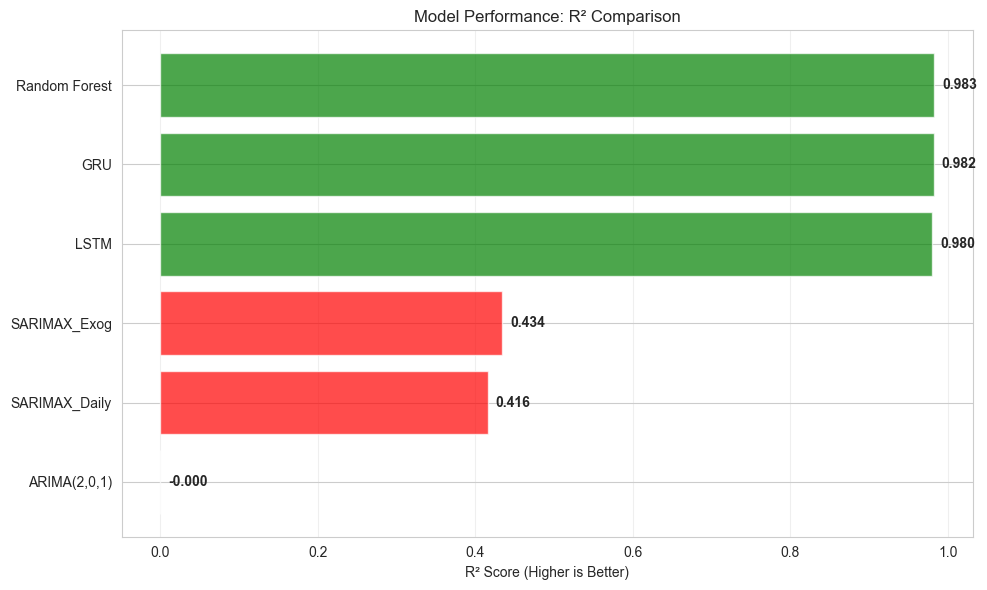

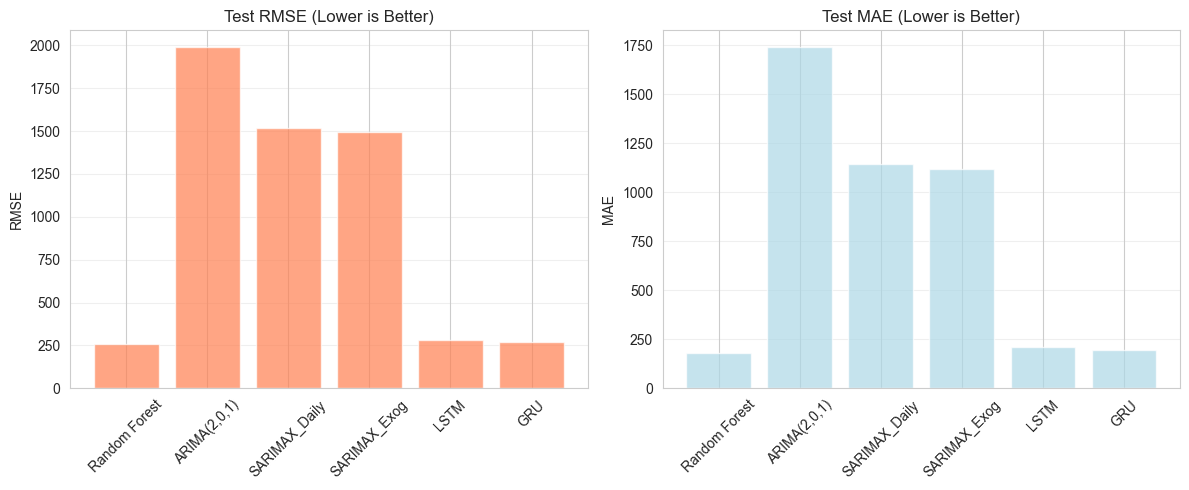

In [4]:
# 3. ESSENTIAL VISUALIZATIONS

# Plot 1: R² Comparison (Main Metric)
plt.figure(figsize=(10, 6))
sorted_models = comparison_df.sort_values('Test_R2', ascending=True)

bars = plt.barh(sorted_models['Model'], sorted_models['Test_R2'], 
                color=['red' if x < 0.5 else 'orange' if x < 0.7 else 'green' for x in sorted_models['Test_R2']],
                alpha=0.7)

# Add value labels
for bar, r2 in zip(bars, sorted_models['Test_R2']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{r2:.3f}', ha='left', va='center', fontweight='bold')

plt.xlabel('R² Score (Higher is Better)')
plt.title('Model Performance: R² Comparison')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Error Metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# RMSE
ax1.bar(comparison_df['Model'], comparison_df['Test_RMSE'], color='coral', alpha=0.7)
ax1.set_title('Test RMSE (Lower is Better)')
ax1.set_ylabel('RMSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# MAE
ax2.bar(comparison_df['Model'], comparison_df['Test_MAE'], color='lightblue', alpha=0.7)
ax2.set_title('Test MAE (Lower is Better)')
ax2.set_ylabel('MAE')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [5]:
#4. KEY CONCLUSIONS
# Find best model
best_model = comparison_df.loc[comparison_df['Test_R2'].idxmax()]

print(f" BEST MODEL: {best_model['Model']}")
print(f"   R²: {best_model['Test_R2']:.4f}")
print(f"   RMSE: {best_model['Test_RMSE']:.2f}")
print(f"   MAE: {best_model['Test_MAE']:.2f}")

# Performance tiers
print(f"\n PERFORMANCE SUMMARY:")
high_perf = comparison_df[comparison_df['Test_R2'] > 0.7]
med_perf = comparison_df[(comparison_df['Test_R2'] > 0.5) & (comparison_df['Test_R2'] <= 0.7)]
low_perf = comparison_df[comparison_df['Test_R2'] <= 0.5]

if len(high_perf) > 0:
    print(f"   High (R² > 0.7): {list(high_perf['Model'])}")
if len(med_perf) > 0:
    print(f"   Medium (0.5 < R² ≤ 0.7): {list(med_perf['Model'])}")
if len(low_perf) > 0:
    print(f"   Low (R² ≤ 0.5): {list(low_perf['Model'])}")

# 5. SAVE ESSENTIAL RESULTS
# Save simplified comparison
comparison_df.to_csv('essential_model_comparison.csv', index=False)
print(f"\nResults saved to 'essential_model_comparison.csv'")

print(f"\n COMPARISON COMPLETE")
print(f"   Best model: {best_model['Model']} (R²: {best_model['Test_R2']:.3f})")

 BEST MODEL: Random Forest
   R²: 0.9829
   RMSE: 259.61
   MAE: 179.43

 PERFORMANCE SUMMARY:
   High (R² > 0.7): ['Random Forest', 'LSTM', 'GRU']
   Low (R² ≤ 0.5): ['ARIMA(2,0,1)', 'SARIMAX_Daily', 'SARIMAX_Exog']

Results saved to 'essential_model_comparison.csv'

 COMPARISON COMPLETE
   Best model: Random Forest (R²: 0.983)
